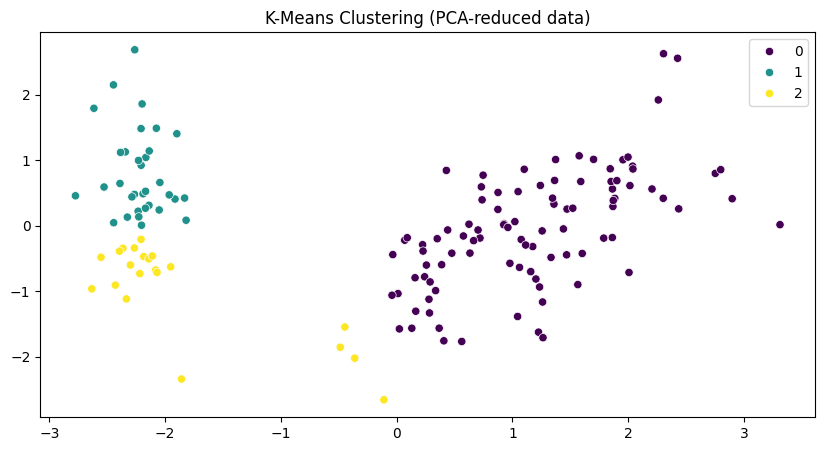

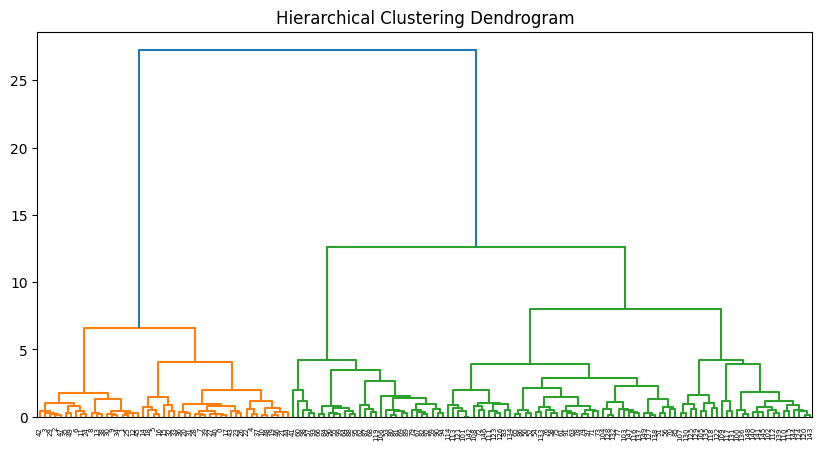

K-Means Results:
   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         3    0.479881         157.360153        0.789363
1         4    0.385045         206.680603        0.869779
2         5    0.345033         202.635850        0.943894

Hierarchical Clustering Results:
   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         3    0.446689         222.719164        0.803467
1         4    0.400636         201.251454        0.978821
2         5    0.330587         192.681283        0.974249

Mean Shift Results:
Silhouette: 0.36, Calinski-Harabasz: 133.42, Davies-Bouldin: 0.78


In [4]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :-1])
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
def evaluate_clustering(labels, data):
    silhouette = silhouette_score(data, labels)
    calinski = calinski_harabasz_score(data, labels)
    davies = davies_bouldin_score(data, labels)
    return silhouette, calinski, davies
kmeans_results = []
k_values = [3, 4, 5]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_scaled)
    silhouette, calinski, davies = evaluate_clustering(kmeans_labels, data_scaled)
    kmeans_results.append((k, silhouette, calinski, davies))
kmeans_results_df = pd.DataFrame(kmeans_results, columns=['Clusters', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
hierarchical_results = []
for k in k_values:
    linkage_matrix = linkage(data_scaled, method='ward')
    hc_labels = fcluster(linkage_matrix, k, criterion='maxclust')
    silhouette, calinski, davies = evaluate_clustering(hc_labels, data_scaled)
    hierarchical_results.append((k, silhouette, calinski, davies))
hierarchical_results_df = pd.DataFrame(hierarchical_results, columns=['Clusters', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
bandwidth = estimate_bandwidth(data_scaled, quantile=0.2)
meanshift = MeanShift(bandwidth=bandwidth)
meanshift_labels = meanshift.fit_predict(data_scaled)
silhouette, calinski, davies = evaluate_clustering(meanshift_labels, data_scaled)
plt.figure(figsize=(10, 5))
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering (PCA-reduced data)')
plt.show()
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(data_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
print("K-Means Results:")
print(kmeans_results_df)
print("\nHierarchical Clustering Results:")
print(hierarchical_results_df)
print("\nMean Shift Results:")
print(f"Silhouette: {silhouette:.2f}, Calinski-Harabasz: {calinski:.2f}, Davies-Bouldin: {davies:.2f}")


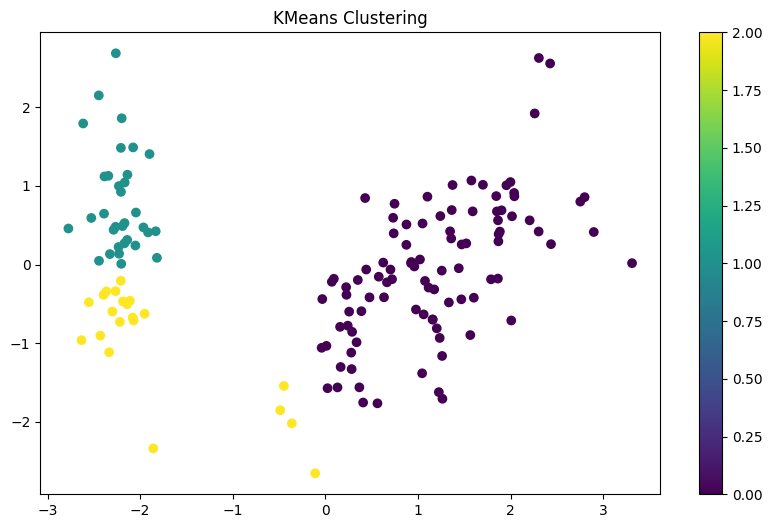

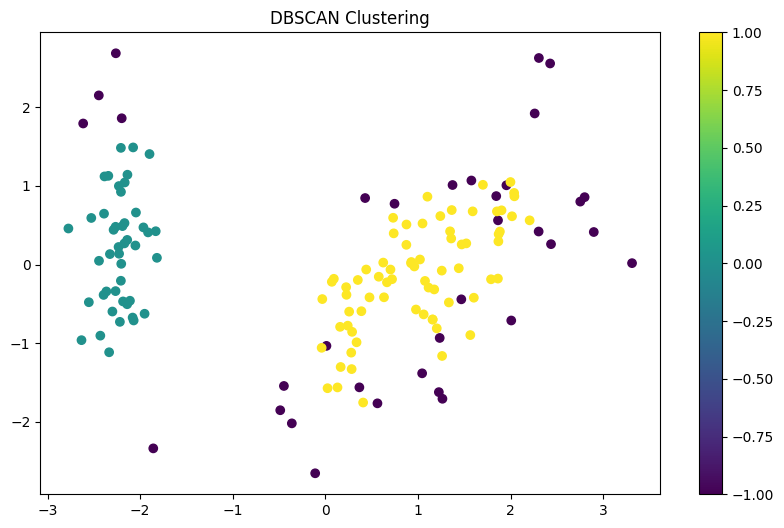

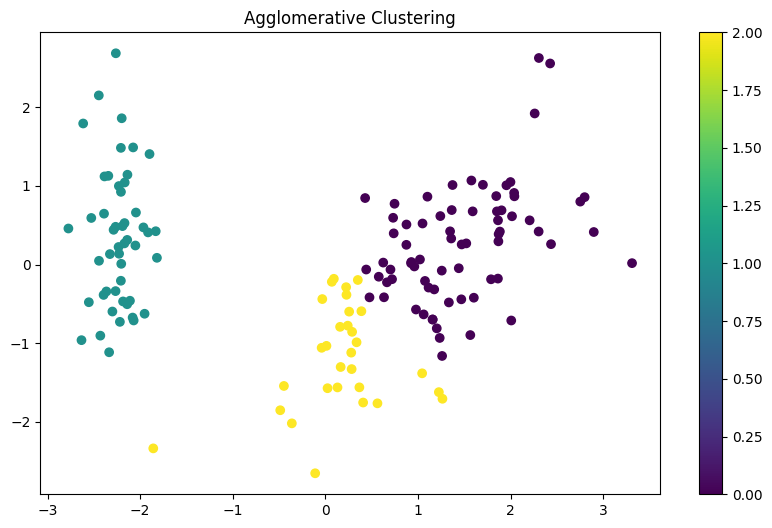

                  Algorithm  Silhouette Score  Adjusted Rand Index
0                    KMeans          0.479881             0.432805
1                    DBSCAN          0.356516             0.442099
2  Agglomerative Clustering          0.446689             0.615323


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_scaled)
def evaluate_clustering(labels, true_labels):
    return {
        'Silhouette Score': silhouette_score(X_scaled, labels),
        'Adjusted Rand Index': adjusted_rand_score(true_labels, labels)
    }
kmeans_eval = evaluate_clustering(kmeans_labels, y)
dbscan_eval = evaluate_clustering(dbscan_labels, y)
agg_eval = evaluate_clustering(agg_labels, y)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clustering")
plt.colorbar()
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.colorbar()
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.colorbar()
plt.show()
evaluation_results = pd.DataFrame({
    'Algorithm': ['KMeans', 'DBSCAN', 'Agglomerative Clustering'],
    'Silhouette Score': [kmeans_eval['Silhouette Score'], dbscan_eval['Silhouette Score'], agg_eval['Silhouette Score']],
    'Adjusted Rand Index': [kmeans_eval['Adjusted Rand Index'], dbscan_eval['Adjusted Rand Index'], agg_eval['Adjusted Rand Index']]
})

print(evaluation_results)
